In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [63]:
# Load the data
df = pd.read_csv('winequality-red.csv')
df.head(8)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7


In [64]:
# Check for missing values
missing_values = df.isnull().sum()

print('Missing values in each column:')
print(missing_values)

print('\
Total missing values:', missing_values.sum())


Missing values in each column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Total missing values: 0


In [65]:
# Check for any infinite values
infinite_values = np.isinf(df).sum()

print('\
Infinite values in each column:')
print(infinite_values)

print('\
Total infinite values:', infinite_values.sum())



Infinite values in each column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Total infinite values: 0


In [66]:
# Display basic information about the dataset
print('\
Dataset Info:')
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [67]:
# Display basic information about the dataset
print('\
Dataset Description:')
print(df.describe())

Dataset Description:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000         

In [68]:
# Separate features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [69]:
# Linear Regression from scratch
class LinearRegression:
    def __init__(self):
        self.coefficients = None
        self.intercept = None
    
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)  # Add intercept term
        self.coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.intercept = self.coefficients[0]
        self.coefficients = self.coefficients[1:]
    
    def predict(self, X):
        return X.dot(self.coefficients) + self.intercept

# Function to calculate R-squared
def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    return 1 - (ss_residual / ss_total)

# Function to calculate Mean Absolute Error
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# function to calculate Mean Square Error
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# function to calculate Root Mean Square Error
def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

In [70]:
# Train the model
model = LinearRegression()
model.fit(X_train.values, y_train.values)

# Make predictions
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)



In [71]:
# Calculate metrics
r2_train = r_squared(y_train, y_train_pred)
r2_test = r_squared(y_test, y_test_pred)
mae_train = mae(y_train, y_train_pred)
mae_test = mae(y_test, y_test_pred)
mse_train = mse(y_train, y_train_pred)
mse_test = mse(y_test, y_test_pred)
rmse_train = rmse(y_train, y_train_pred)
rmse_test = rmse(y_test, y_test_pred)

print('R-squared (Training):', r2_train)
print('R-squared (Test):', r2_test)
print('MAE (Training):', mae_train)
print('MAE (Test):', mae_test)
print('MSE (Training):', mse_train)
print('MSE (Test):', mse_test)
print('RMSE (Training):', rmse_train)
print('RMSE (Test):', rmse_test)

print('Done_printing_metrics')



R-squared (Training): 0.3479926193529862
R-squared (Test): 0.40318034135862346
MAE (Training): 0.4996196412117952
MAE (Test): 0.5035304415922555
MSE (Training): 0.4241911573139901
MSE (Test): 0.39002514391232695
RMSE (Training): 0.6512995910592836
RMSE (Test): 0.6245199307566789
Done_printing_metrics


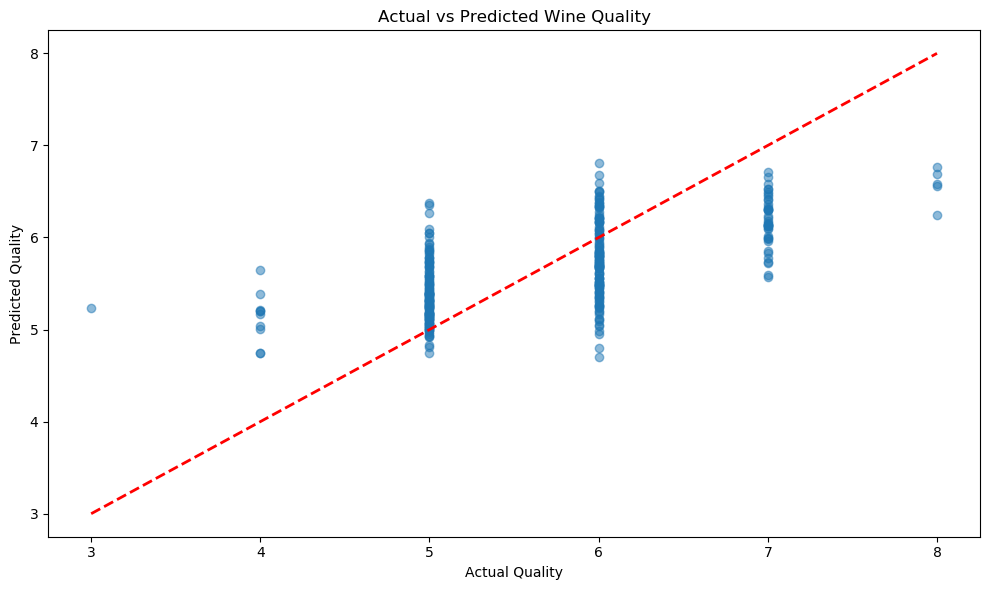

fixed acidity: 0.0231
volatile acidity: -1.0013
citric acid: -0.1408
residual sugar: 0.0066
chlorides: -1.8065
free sulfur dioxide: 0.0056
total sulfur dioxide: -0.0036
density: -10.3516
pH: -0.3937
sulphates: 0.8412
alcohol: 0.2819
Intercept: 14.3551
Done


In [72]:
# Plot actual vs predicted values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Wine Quality')
plt.tight_layout()
plt.show()

# Print coefficients
for name, coef in zip(X.columns, model.coefficients):
    print(f'{name}: {coef:.4f}')
print(f'Intercept: {model.intercept:.4f}')

print('Done')